# Three-input models


## Make an input layer for home vs. away
Now you will make an improvement to the model you used in the previous chapter for regular season games. You know there is a well-documented home-team advantage in basketball, so you will add a new input to your model to capture this effect.

This model will have three inputs: team_id_1, team_id_2, and home. The team IDs will be integers that you look up in your team strength model from the previous chapter, and home will be a binary variable, 1 if team_1 is playing at home, 0 if they are not.

The team_strength_model you used in the previous chapter has been loaded into your workspace. After applying it to each input, use a Concatenate layer to join the two team strengths and with the home vs away variable, and pass the result to a Dense layer.

### init

In [2]:
###################
##### Keras model
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(team_strength_model)
"""

tobedownloaded="""
{keras.engine.training.Model: {'team_strength_model.h5': 'https://file.io/MoIqCU'}}
"""
prefix='data_from_datacamp/Chap3-Exercise1.1_'
saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import loadModelFromH5
team_strength_model = loadModelFromH5(prefix+'team_strength_model.h5')


Téléchargements à lancer

{keras.engine.training.Model: {"team_strength_model.h5": "https://file.io/MoIqCU"}}

{'keras.engine.training.Model': {'team_strength_model.h5': 'https://file.io/MoIqCU'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 54568    0 54568    0     0  59248      0 --:--:-- --:--:-- --:--:-- 59248









C:\Users\F279814\AppData\Local\Continuum\anaconda3\envs\datacamp\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [6]:
# Import the Subtract layer from keras
from keras.layers import Input, Subtract, Concatenate, Dense

### code

In [7]:
# Create an Input for each team
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')

# Create an input for home vs away
home_in = Input(shape=(1,), name='Home-In')

# Lookup the team inputs in the team strength model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

# Combine the team strengths with the home input using a Concatenate layer, then add a Dense layer
out = Concatenate()([team_1_strength, team_2_strength, home_in])
out = Dense(1)(out)

## Make a model and compile it
Now that you've input and output layers for the 3-input model, wrap them up in a Keras model class, and then compile the model, so you can fit it to data and use it to make predictions on new data.

### code

In [12]:
# Import the model class
from keras.models import Model

# Make a Model
model = Model([team_in_1, team_in_2, home_in], out)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

## Fit the model and evaluate
Now that you've defined a new model, fit it to the regular season basketball data.

Use the model you fit in the previous exercise (which was trained on the regular season data) and evaluate the model on data for tournament games (games_tourney).

### init

In [11]:
###################
##### Keras model
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(games_season, games_tourney)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'games_season.csv': 'https://file.io/0n10cF',
  'games_tourney.csv': 'https://file.io/rLfLFf'}}
"""
prefix='data_from_datacamp/Chap3-Exercise1.3_'
saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
games_tourney = pd.read_csv(prefix+'games_tourney.csv',index_col=0)
games_season = pd.read_csv(prefix+'games_season.csv',index_col=0)



Téléchargements à lancer

{pandas.core.frame.DataFrame: {"games_season.csv": "https://file.io/0n10cF",
  "games_tourney.csv": "https://file.io/rLfLFf"}}

{'pandas.core.frame.DataFrame': {'games_season.csv': 'https://file.io/0n10cF', 'games_tourney.csv': 'https://file.io/rLfLFf'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
100  846k    0  846k    0     0   174k      0 --:--:--  0:00:04 --:--:--  174k
100 2151k    0 2151k    0     0   364k      0 --:--:--  0:00:05 --:--:--  470k
100 225

### code

In [17]:
# Fit the model to the games_season dataset
model.fit([games_season['team_1'], games_season['team_2'], games_season['home']],
          games_season['score_diff'],
          epochs=1,
          verbose=True,
          validation_split=0.1,
          batch_size=2048)

# Evaluate the model on the games_tourney dataset
print(model.evaluate([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']],
          games_tourney['score_diff'], verbose=False))

Train on 280960 samples, validate on 31218 samples
Epoch 1/1
280960/280960 [==============================] - 0s 1us/step - loss: 11.9189 - val_loss: 13.1155
11.68859092863765


# Summarizing and plotting models


## Plotting models
In addition to summarizing your model, you can also plot your model to get a more intuitive sense of it. Your model is available in the workspace.

### init

In [18]:
###################
##### Keras model
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(model)
"""

tobedownloaded="""
{keras.engine.training.Model: {'model.h5': 'https://file.io/5rVAow'}}
"""
prefix='data_from_datacamp/Chap3-Exercise2.1_'
saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import loadModelFromH5
model = loadModelFromH5(prefix+'model.h5')



Téléchargements à lancer

{keras.engine.training.Model: {"model.h5": "https://file.io/5rVAow"}}

{'keras.engine.training.Model': {'model.h5': 'https://file.io/5rVAow'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 61168    0 61168    0     0  61599      0 --:--:-- --:--:-- --:--:-- 61599


C:\Users\F279814\AppData\Local\Continuum\anaconda3\envs\datacamp\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


### code

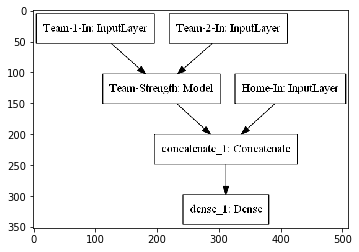

In [19]:
# Imports
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Plot the model
plot_model(model, to_file='data_from_datacamp\chap3_2.1_model.png')

# Display the image
data = plt.imread('data_from_datacamp\chap3_2.1_model.png')
plt.imshow(data)
plt.show()

# Stacking models


## Add the model predictions to the tournament data
In lesson 1 of this chapter, you used the regular season model to make predictions on the tournament dataset, and got pretty good results! Try to improve your predictions for the tournament by modeling it specifically.

You'll use the prediction from the regular season model as an input to the tournament model. This is a form of "model stacking."

To start, take the regular season model from the previous lesson, and predict on the tournament data. Add this prediction to the tournament data as a new column.



### init

In [20]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(games_tourney, model)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'games_tourney.csv': 'https://file.io/BPefm4'},
 keras.engine.training.Model: {'model.h5': 'https://file.io/y4e6mk'}}
"""
prefix='data_from_datacamp/Chap3-Exercise3.1_'
saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
games_tourney = pd.read_csv(prefix+'games_tourney.csv',index_col=0)
from downloadfromFileIO import loadModelFromH5
model = loadModelFromH5(prefix+'model.h5')



Téléchargements à lancer

{pandas.core.frame.DataFrame: {"games_tourney.csv": "https://file.io/BPefm4"},
 keras.engine.training.Model: {"model.h5": "https://file.io/y4e6mk"}}

{'pandas.core.frame.DataFrame': {'games_tourney.csv': 'https://file.io/BPefm4'}, 'keras.engine.training.Model': {'model.h5': 'https://file.io/y4e6mk'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  146k    0  146k    0     0   168k      0 --:--:-- --:--:-- --:--:--  168k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0

### code

In [24]:
# Predict
games_tourney['pred'] = model.predict([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']])

## Create an input layer with multiple columns
In this exercise, you will look at a different way to create models with multiple inputs. This method only works for purely numeric data, but its a much simpler approach to making multi-variate neural networks.

Now you have three numeric columns in the tournament dataset: 'seed_diff', 'home', and 'pred'. In this exercise, you will create a neural network that uses a single input layer to process all three of these numeric inputs.

This model should have a single output to predict the tournament game score difference.

### code

In [27]:
# Create an input layer with 3 columns
input_tensor = Input((3,))

# Pass it to a Dense layer with 1 unit
output_tensor = Dense(1)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

## Fit the model
Now that you've enriched the tournament dataset and built a model to make use of the new data, fit that model to the tournament data.

Note that this model has only one input layer that is capable of handling all 3 inputs, so it's inputs and outputs do not need to be a list.

Tournament games are split into a training set and a test set. The tournament games before 2010 are in the training set, and the ones after 2010 are in the test set.



### init

In [28]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(games_tourney_train, games_tourney_test)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'games_tourney_test.csv': 'https://file.io/LoAJZX',
  'games_tourney_train.csv': 'https://file.io/d0qpkr'}}
"""
prefix='data_from_datacamp/Chap3-Exercise3.3_'
saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
games_tourney_train = pd.read_csv(prefix+'games_tourney_train.csv',index_col=0)
games_tourney_test = pd.read_csv(prefix+'games_tourney_test.csv',index_col=0)



Téléchargements à lancer

{pandas.core.frame.DataFrame: {"games_tourney_test.csv": "https://file.io/LoAJZX",
  "games_tourney_train.csv": "https://file.io/d0qpkr"}}

{'pandas.core.frame.DataFrame': {'games_tourney_test.csv': 'https://file.io/LoAJZX', 'games_tourney_train.csv': 'https://file.io/d0qpkr'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 49208    0 49208    0     0  49604      0 --:--:-- --:--:-- --:--:-- 49604
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:

### code

In [29]:
# Fit the model
model.fit(games_tourney_train[['home', 'seed_diff', 'pred']],
          games_tourney_train['score_diff'],
          epochs=1,
          verbose=True)

Epoch 1/1
3168/3168 [==============================] - 0s 80us/step - loss: 9.3165


## Evaluate the model
Now that you've fit your model to the tournament training data, evaluate it on the tournament test data. Recall that the tournament test data contains games from after 2010.

### init

In [34]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO( games_tourney_test)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'games_tourney_test.csv': 'https://file.io/GNAO51'}}
"""
prefix='data_from_datacamp/Chap3-Exercise3.4_'
saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
games_tourney_test = pd.read_csv(prefix+'games_tourney_test.csv',index_col=0)


Téléchargements à lancer

{pandas.core.frame.DataFrame: {"games_tourney_test.csv": "https://file.io/GNAO51"}}

{'pandas.core.frame.DataFrame': {'games_tourney_test.csv': 'https://file.io/GNAO51'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 49214    0 49214    0     0  51211      0 --:--:-- --:--:-- --:--:-- 51211


### code

In [35]:
# Evaluate the model on the games_tourney_test dataset
print(model.evaluate(games_tourney_test[['home', 'seed_diff', 'prediction']],
          games_tourney_test['score_diff'], verbose=False))

8.99064951497663
